In [1]:
from ast import literal_eval

import numpy as np
import corner

import matplotlib.pyplot as plt
pltparams = {"axes.grid": False,
        "text.usetex" : True,
        "font.family" : "serif",
        "ytick.color" : "black",
        "xtick.color" : "black",
        "axes.labelcolor" : "black",
        "axes.edgecolor" : "black",
        "font.serif" : ["Computer Modern Serif"],
        "xtick.labelsize": 16,
        "ytick.labelsize": 16,
        "axes.labelsize": 16,
        "legend.fontsize": 16,
        "legend.title_fontsize": 16,
        "figure.titlesize": 16,
        "figure.constrained_layout.use": False}

plt.rcParams.update(pltparams)

default_corner_kwargs = dict(bins=40, 
                        smooth=True, 
                        label_kwargs=dict(fontsize=16),
                        title_kwargs=dict(fontsize=16), 
                        quantiles=[],
                        levels=[0.68, 0.95],
                        plot_density=False, 
                        plot_datapoints=False, 
                        fill_contours=False,
                        max_n_ticks=3, 
                        min_n_ticks=3,
                        save=False,
                        truth_color="darkorange")

import pandas as pd

from fiesta.plot import corner_plot


## Systematic uncertainty variable

Load the data

In [2]:
with open("./data/param_dict.dat", "r") as f:
    params = f.read()
params = literal_eval(params)


posterior_nmma = pd.read_csv("./outdir_nmma/injection_gaussian_posterior_samples.dat", sep=" ", header=0)
posterior_fiesta =  pd.DataFrame(dict(np.load("./outdir_fiesta/posterior.npz")))
#posterior_nmma_x_fiesta = pd.read_csv("./outdir_nmma_x_fiesta/injection_gaussian_posterior_samples.dat", sep=" ", header=0)
#posterior_nmma_x_fiesta["sys_err"] = posterior_nmma_x_fiesta["em_syserr"]

Make corner plot

In [3]:
var_names = ["inclination_EM", "log10_E0", "thetaCore", "alphaWing", "log10_n0", "p", "log10_epsilon_e", "log10_epsilon_B", "sys_err"]
truths = [params[key] for key in var_names[:-1]]
truths.append(None)

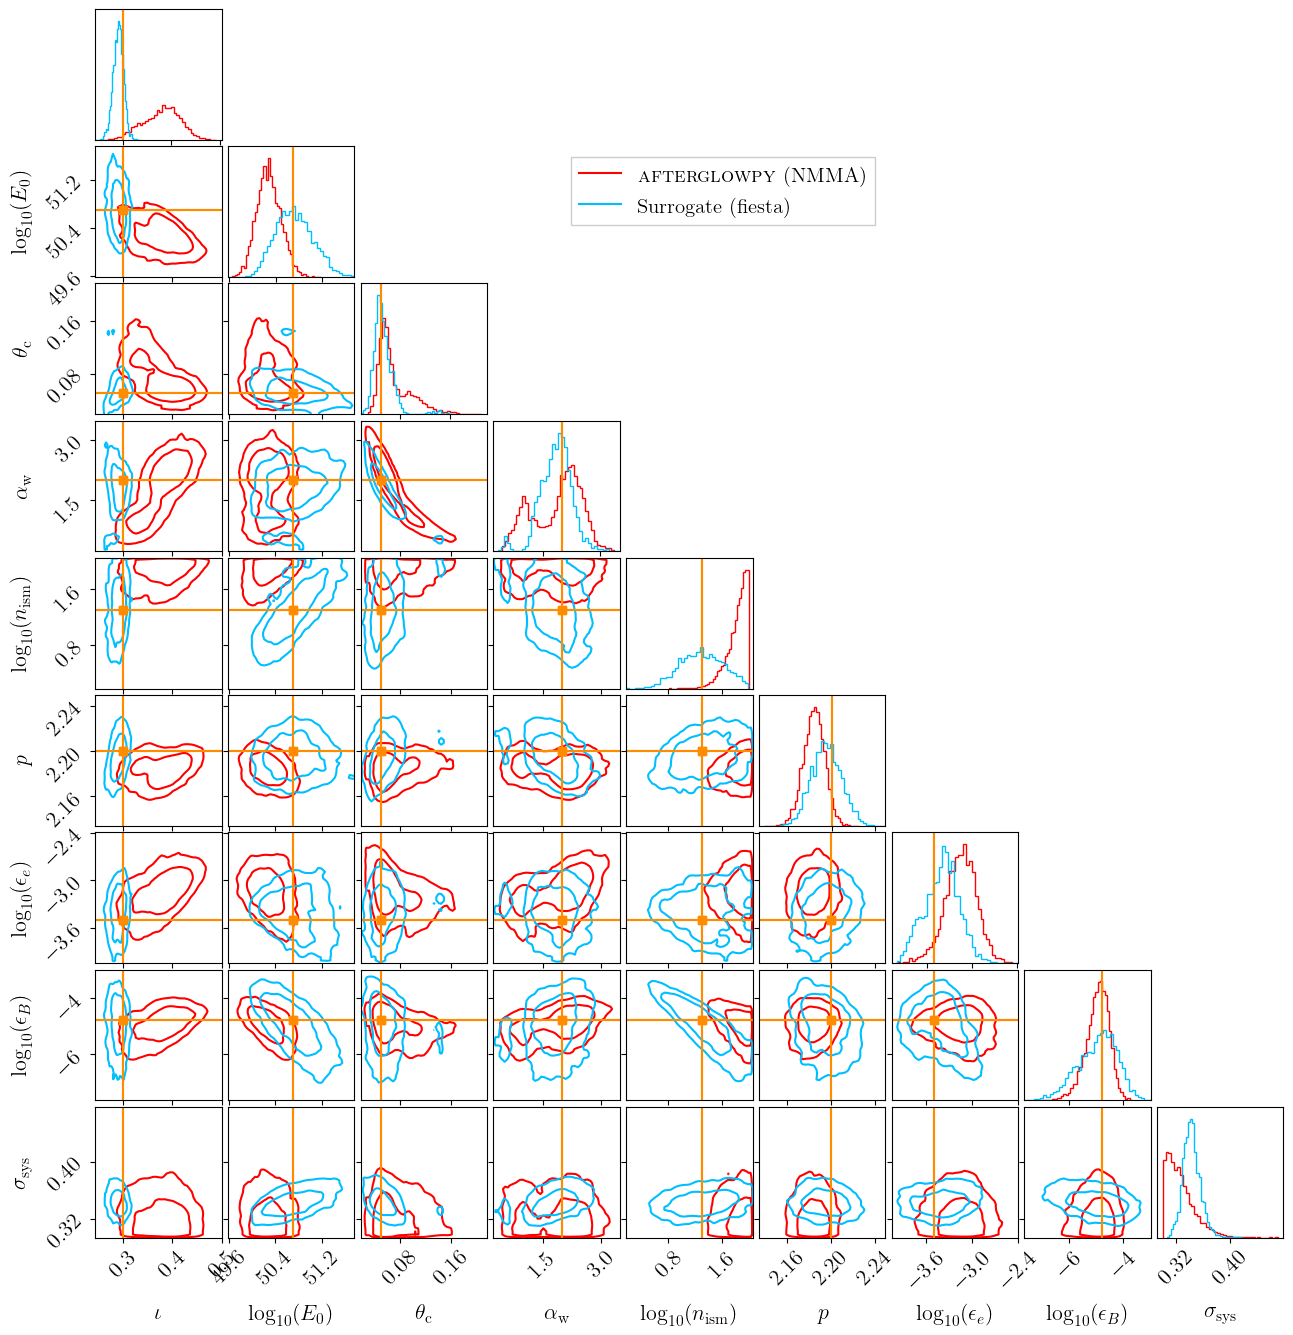

In [4]:

fig, ax = corner_plot(posterior_nmma, parameter_names=var_names, truths=params, color="red")
fig, ax = corner_plot(posterior_fiesta, parameter_names=var_names, truths=params, color="deepskyblue", fig=fig, ax=ax)

handles = []
for c in ["red", "deepskyblue"]:
    handle = plt.plot([],[], color=c)[0]
    handles.append(handle)

ax[1, 5].legend(handles=handles, labels=["\\textsc{afterglowpy} (NMMA)", "Surrogate (fiesta)"], fontsize=15, fancybox=False, framealpha=1)
fig.subplots_adjust(left=0.08, bottom=0.08, right=0.96, top=0.99)

#fig.savefig("./figures/injection_afgpy_gaussian.pdf", dpi=250, bbox_inches="tight")
plt.show()